In [1]:
import os

import pprint
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from VanillaInfoGAN import VanillaInfoGAN
from InfoDCGAN import InfoDCGAN

pp = pprint.PrettyPrinter()

%matplotlib inline

flags = tf.app.flags

flags.DEFINE_integer('input_dim', 784, 'dimension of the discriminator input placeholder [784]')
flags.DEFINE_integer('z_dim', 5, 'dimension of the generator input noise variable z [5]')
flags.DEFINE_integer('c_cat', 10, 'dimension of the categorical latent code [10]')
flags.DEFINE_integer('c_cont', 2, 'dimension of the continuous latent code [2]')
flags.DEFINE_integer('d_update', 2, 'update the discriminator weights [d_update] times per generator/Q network update [2]')
flags.DEFINE_integer('batch_size', 128, 'batch size to use during training [128]')
flags.DEFINE_integer('nepoch', 100, 'number of epochs to use during training [100]')
flags.DEFINE_float('lr', 0.001, 'learning rate of the optimizer to use during training [0.001]')
flags.DEFINE_float('max_grad_norm', 40, 'clip L2-norm of gradients to this threshold [40]')
flags.DEFINE_string('gan_type', 'InfoDCGAN', 'input "VanillaInfoGAN" to use Vanilla InfoGAN; otherwise, input "InfoDCGAN" [VanillaInfoGAN]')
flags.DEFINE_string('checkpoint_dir', './checkpoints', 'checkpoint directory [./checkpoints]')
flags.DEFINE_string('image_dir', './images', 'directory to save generated images to [./images]')
flags.DEFINE_bool('use_adam', True, 'if True, use Adam optimizer; otherwise, use SGD [True]')
flags.DEFINE_bool('show_progress', False, 'print progress [False]')

FLAGS = flags.FLAGS

In [1]:
with tf.Session() as sess:

    if FLAGS.gan_type == 'VanillaInfoGAN':
        model = VanillaInfoGAN(FLAGS, sess)
    elif FLAGS.gan_type == 'InfoDCGAN':
        model = InfoDCGAN(FLAGS, sess)
    else:
        raise Exception("Unimplemented Type of InfoGAN")

    model.build_model()
    model.run()

In [9]:
c_cat = np.zeros(shape=[16, 10], dtype=np.float32)
c_cat[:4, 1].fill(1.)
c_cat[4:8, 2].fill(1.)
c_cat[8:12, 3].fill(1.)
c_cat[12:, 4].fill(1.)

c_cont = np.zeros(shape=[16, 2], dtype=np.float32)

with tf.Session() as sess:
    model = VanillaInfoGAN(FLAGS, sess)
    model.build_model()
    pred = model.generate(c_cat, c_cont)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
[*] Reading Checkpoints...
INFO:tensorflow:Restoring parameters from ./checkpoints\InfoGAN.model


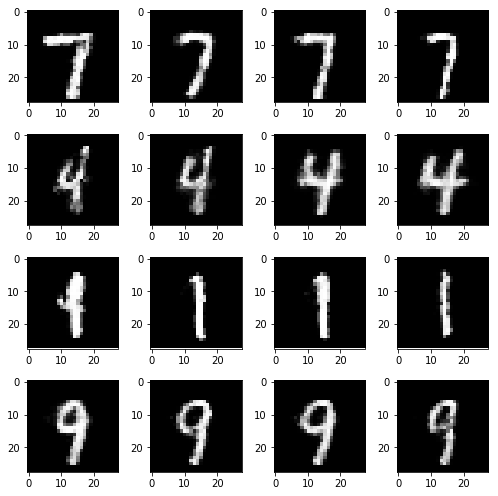

In [10]:
plt.figure(figsize=(7, 7))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(pred[i].reshape(28, 28), vmin=0, vmax=1, interpolation='NONE', cmap=plt.get_cmap('gray'))

plt.tight_layout()